<a href="https://colab.research.google.com/github/faryal-art/week4_pytorch/blob/main/ch01_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Workflow
what we are going to cover
1. Prepare and load data
2. Build a Model
3. Fit the model to data(training)
4. Making predictions and evaluating a model (Testing)
5. Saving and loading a model
6. Putting it all together

In [673]:
import torch
from torch import nn # nn contains all of pytorch's building blocks for neural network
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__


'2.6.0+cu124'

### 1. Data (preparing and loading)
Data can be almost anything.... in machine learning
* Excel spreadsheet
* images
* videos
* Audios
* DNA
* Text
Machine  learning is a game of 2 parts:
1. Get data in numerical representation
2. build a model to learn patterns in that numerical data

To showcase this ,lets create some *known* data using the linear regression formula.
linear regression formula
y=a+bX . Where
* X = independent variable
* Y = dependent variable
* b = slope of line(gradient)/weight
* a = intercept/bias

we  will use linear rgression formula to make a straight line with known **Parameters**





In [674]:
# create know parameters
weight= 0.7
bias=0.3

# we need to build the model that can estimate thess numbers for weight and bias

# create some data

X= torch.arange(start=0,end=1,step=0.02).unsqueeze(dim=1)
Y=bias+(weight*X)
#check few numbers
X[:10],Y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [675]:
len(X),len(Y)
# so there is 50 input features and 50 labels for them

(50, 50)

### Spliting the data into training and test sets
lrts split our data
* 80% for training
* 20% for testing


In [676]:
# create a train / test split
#create a training split
train_split=int(0.8*len(X))
X_train,Y_train=X[:train_split],Y[:train_split] # takes everything from start to train split

# Testing spit
X_test,Y_test=X[train_split:],Y[train_split:] # take everything from trainsplit to onwards

# check number of training and testion sample
len(X_train),len(Y_train),len(X_test),len(Y_test)


(40, 40, 10, 10)

Data explorer's motto
visualize,visualize,visualize

In [677]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     prediction= None
                     ):
  """
  plots training data ,test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #plot training data in green
  plt.scatter(train_data,train_labels, c="g" ,s=4, label="Training data")

  #plot Testing data in red
  plt.scatter(test_data,test_labels, c="r" ,s=4 , label="Testing data")

#check if predictions are there
  if prediction is not None:
  #plot the prediction
    plt.scatter(test_data,prediction, c ="b", s=4 , label="predictions")

  #show the legend
  plt.legend();
  plt.show()

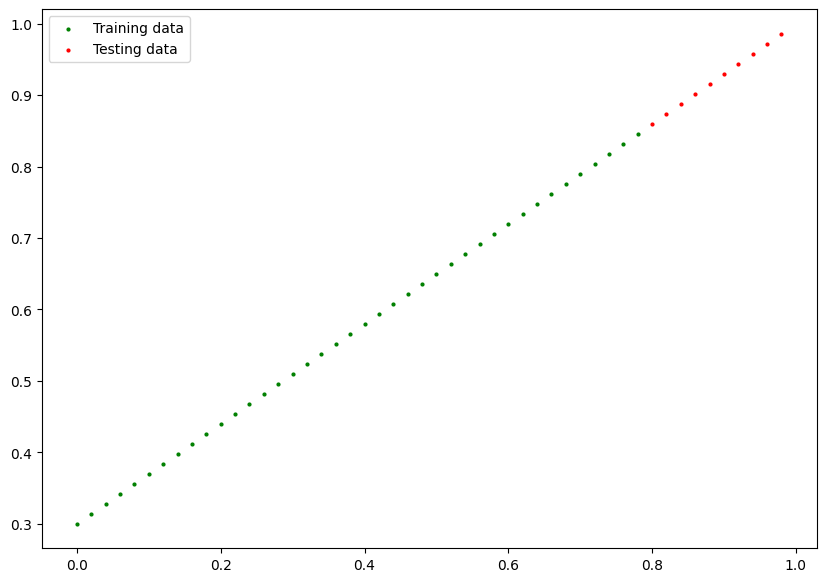

In [678]:
 plot_predictions ();

### Build a model
our first pytorch model
The goal of the model is
* We will start with random values for parameters(weight and bias)
* Look at the data and **Update**  those random numbers (values of parameter)  to better represent the ideal vaues (the weight and bias) to create a best fit


  How  does it do so?
  
  Through two main algorithms
  1. Gradient descent
   * Gradient Descent is an optimization algorithm used to minimize the loss (error) of a model by updating its parameters (like weights and biases).
   * How It Works (Simple Steps):
      1. Start with random weights.

      2. Calculate the loss (how wrong the prediction is).

      3. Find the gradient (direction to change weights to reduce the loss).

      4. Update the weights by taking a small step in the opposite direction of the gradient.

      5. Repeat until the loss becomes very small.

      6. The amount of step is controlled by a value called learning rate.




  2. Backpropagation
     * Backpropagation (short for "backward propagation of errors") is the process of computing gradients — it figures out how much each weight contributed to the error so we can update it using gradient descent.
    *  How It Works:
        1. Forward Pass: Data flows through the model to make predictions.

        2. Loss Calculation: Compare predictions with actual values.

        3. Backward Pass:

             * Use the chain rule from calculus to calculate how much each weight affected the loss.

             * Store those gradients.

             These gradients are then used by gradient descent to update the weights.



In [679]:
# create linear regression model class
# our class inheret from nn.module
# almost everything in pytorch inheret from  nn.module
# nn.Module is base class for all neural network
class linearregression(nn.Module): # nn.Module contains all the building blocks for neural network
  def __init__(self):
    # Function to set random values of weights and bias
    super().__init__()
    #  requires_grad=True -> it tells pytorch to track this tensor for gradients
    self.weights=nn.Parameter(torch.randn(1, #start with random weight and it will get updated in future on the base of data
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
  #Forward method to define the computation in the model
  def forward(self,X: torch.tensor) ->torch.tensor:#<- x is input data,it will take tensor as input and return tensor as output
      return self.weights*X+self.bias



### Pytorch Model building essentials

* torch.nn - contains all of the building blocks for computational graphs (another word for neural nekwork)
* torch.nn.parameter -what parameters should our model try and learn, often a pytorch layer from torch.nn will set these for u
* torch.nn.Module - The base class for all neural network modules ,if you subclass it , you should overwrite forward()
* torch.optim- this is where optimizers in pytorch live, they will help with gradient descent

* def forward() - all nn.Module subclasses require you to overwrite forward () , this method defines what happens in the forward computation
*  torch.utils.data.Dataset - helpfull in case of complex dataset , help us load data
* torch.utils.data.DataLoader - helpfull in case of complex dataset ,same help us load data

differnt functions/attributes used at different stages during the process of neural network
1. get data ready
  * torchvision.transform
  * torch.utils.data.Dataset
  * torch.utils.data.DataLoader

2. Build or pick a model
    * torch.nn
    * torch.nn.Module
    * torchvision.models
3. if we want to optimize the parameters of our model
    * torch.optim
4. to evaluate the model
    * torchmetrics
5. Improve through experimentations
    * torch.utils.tensorboard


### checking the content of our pytorch model
our model is created lets see what is inside

so we check our model parameters or what inside our model using `.parameters()`

In [680]:
# create a random seed
torch.manual_seed(42)

 # create an instance of the model (this is a subclass of nn.module)
model_0=linearregression()

# check out parameters
list(model_0.parameters())




[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [681]:
# list named parameters for better understanding
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

fundamental/entire fundation of deep learning
* we start with some random value
* we use gradient descent + backpropagation + data we are working with  to move those random values as close as possible to the ideal values

### Making predictions using `torch.inference_mode()
to check our model's predictive power . let's see how well it predictics `Y_test` based on `X_test`
when we pass data through our model, it's going to run it through the `forward()` method


In [682]:
X_test,Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [683]:
y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [684]:
#make predictions with model
with torch.inference_mode():
 #inference_mode() method is use to make predictions.it turns off gradient tracking.make prediction faster as it does not have to keep the track of a lot of numbers
  y_preds=model_0(X_test)
y_preds

# alternative way to do the same as above but torch.infrence_mode() is prefered
'''
with torch.no_grad():
  y_preds=model_0(X_test)
y_preds   '''

'\nwith torch.no_grad():\n  y_preds=model_0(X_test)\ny_preds   '

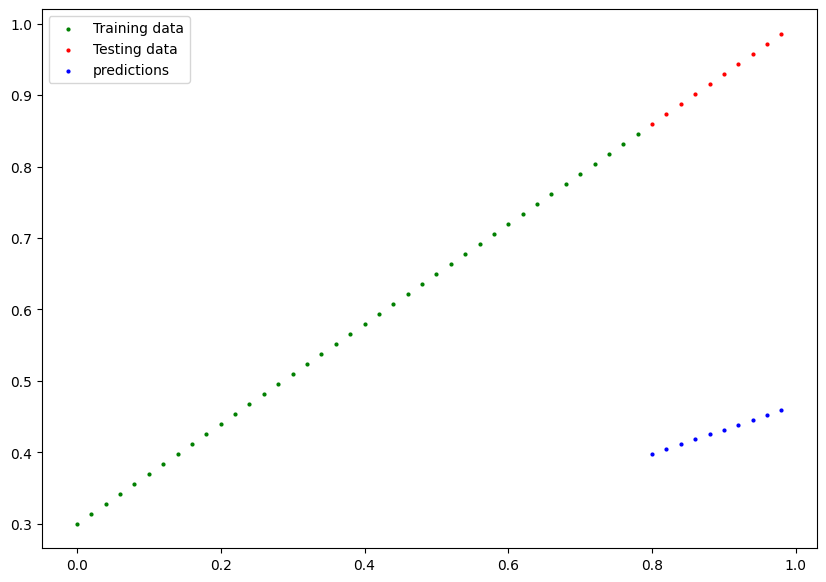

In [685]:
plot_predictions(prediction=y_preds)

the blue dots shows that where we are and red  dots shows where we should be . so we can do that by training our model to adjust values of weights and bias in a way we get better representation of our data

## 3. Train the model

 * The whole idea of training is for a model to move from some *unknown* parameters (can be random) to some *known* parameters.
 * In other words from poor representation of data to better representation of data .

* one way to measure how poor or how wrong your models predictions are is to use loss function.
  * loss functions can also be called as cost function or criterion in different areas . for our case we are going to refer it as loss function
  *  **Loss function** a function to measure how wrong your model's predictions are from the ideal outputs
.lower loos function means better predictions


things we need to train :
1. loss function
2. optimizer:  checks the loss function and then adjust the model's parameters(weight and bias). adjust the parameters to reduce the loss

And specificaly for pytorch , we need
1. a training loop
2. a testing loop

In [686]:
# check out model's parameters(a parameter is a value that a model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [687]:
# setup loss function
loss_fn=nn.L1Loss()


#setup optimizer (SGD = stochastic gradient descent)
opt=torch.optim.SGD( params = model_0.parameters(),
                    lr=0.01) #lr = learning rate = possibly the most important hyperparameter(we can  set ourself)
                     # lr - control the change in the parameters

In [688]:
loss_fn

L1Loss()

### Buildin a trainig loop ( and testing loop ) in pytorch.

  A couple of things we need in a training loop :
  0. loop through the data
  1. forward pass/ forward propagation(this involves data moving through our model's `forward()` function . A forward pass is only data moving from input to output layer. mainly used to  make predictions on data.
  2. calculate the loss (compare forward pass predictions to actual  outpur (predicted output - actual output)

  3. optimizer zero grad
  4. Loss backward(**Back propagation**) - move backwards through the network to calculate the gradients of the parameters of our model with respect of our model with respect to the loss
  5. Optimizer step(**Gradient Descent**) - use the optimizer to adjust our model's parameters to try and improve the loss

In [689]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [690]:
# our ideal model is using X_test to predict Y_test

In [691]:
#gingle to remember the training loop
#epoch in range
# the model got train
# do a forward pass
# calculate the loos
# optimizer zero grad
# loss backwad
# optimizer step step step

## for testing loop
#model got eval
#torch inference mode
# do a forward pass
 # calculate the loss
 ### print out what's happening


In [692]:
# no of epoch tells how many times we have to loop through data...
# pass the data through the model for number of epochs ((eg. 142))
#epoch is hyper parameter
epochs=210

# create empty lists for storing values that are helpful for tracking model progress
epoch_count=[]
train_loss_values=[]
test_loss_values=[]



### Training
# 0. loop through data
for epoch in range(epochs):
  #set model for training
  model_0.train() #train mode sets all the parameters that requires gradients to gradient

  #1. forward pass
  # perform some calculations on the data we pass
  y_pred=model_0(X_train)

  # 2. calculate loss
  # how wrong the models predictions are
  loss=loss_fn(y_pred,Y_train)
  #print(f"epoch no: {epoch}")
  #print(f"loss: {loss}")

  #3. optimizer zero grad
  # Clear old gradients
  opt.zero_grad()

  # 4. perform  back propagation on the loss with respect to the parameters of the model
  #Calculates gradients (∂loss/∂weights)
  loss.backward()

  # 5. step the optimizer (perform gradient descent)
  # updates the model’s parameters (like weights and biases) using the gradients that were calculated during backpropagation
  opt.step()


  #testing
  #put the model in evaluation mode
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): #for faster performance
     #turns off gradient tracking and couple of things

     #1. do the forward pass
     #pass the test data through the model
     test_pred=model_0(X_test)

     #2. calculate the loss
     test_loss=loss_fn(test_pred,Y_test)

  #print what is happening
  if epoch% 10 ==0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"epoch: {epoch} | Loss : {loss} | test loss: {test_loss}")

      #print out model state_dict
    print(model_0.state_dict())


epoch: 0 | Loss : 0.31288138031959534 | test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch: 10 | Loss : 0.1976713240146637 | test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch: 20 | Loss : 0.08908725529909134 | test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch: 30 | Loss : 0.053148526698350906 | test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch: 40 | Loss : 0.04543796554207802 | test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch: 50 | Loss : 0.04167863354086876 | test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch: 60 | Loss : 0.03818932920694351 | test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

before training loop the value for
* weight = 0.3367
* bias= o.1288

after training loop
* weight= 0.6990
* bias= 0.3093

In [693]:
print(f"the value for weight parameter we want after traning : {weight}")
print(f" the value for bias parameter we want after traning : {bias}")
#



the value for weight parameter we want after traning : 0.7
 the value for bias parameter we want after traning : 0.3


In [694]:
print(f"the value of parameters after training")
model_0.state_dict()


the value of parameters after training


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [695]:
 with torch.inference_mode():
  y_preds_new=model_0(X_test)


In [696]:
# a scatter plot formed on the predictions / data we have before traning

old prediction plot: tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


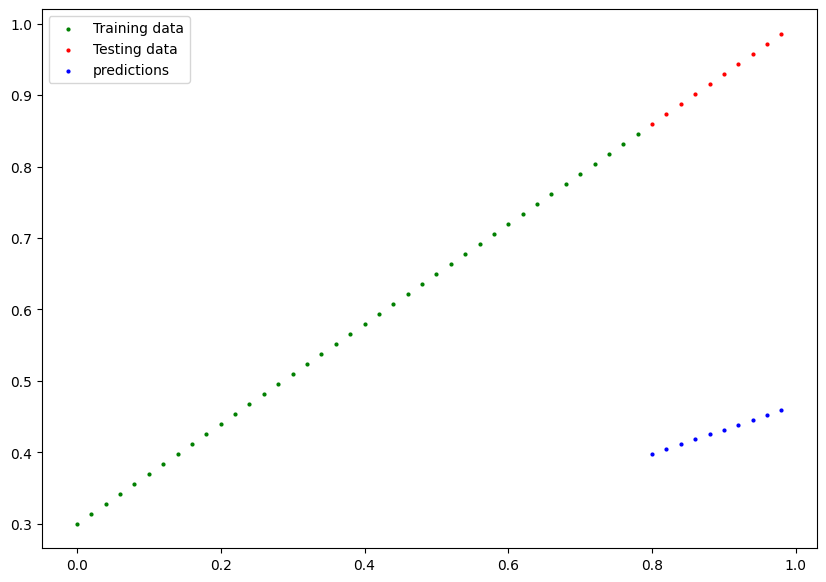

In [697]:
print(f"old prediction plot: {y_preds}")
plot_predictions(prediction=y_preds);


In [698]:
print("what predictions should be ")
Y_test

what predictions should be 


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

new predictiond: tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])


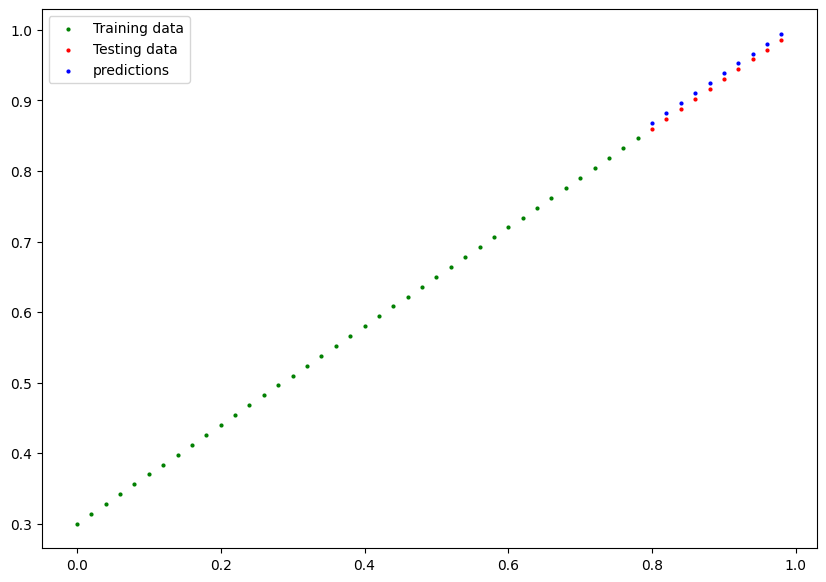

In [699]:
print(f"new predictiond: { y_preds_new}")
plot_predictions(prediction= y_preds_new)

In [700]:
## keep track of model's training and testing
epoch_count,train_loss_values,test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  t

In [701]:
#plot the loss curves
#plt.plot() does not plot loss curvers when values are tensor
# first we need to convert them into numpy
import numpy as np
epoch_count
test_loss_values
numpy_loss=np.array(torch.tensor(train_loss_values).numpy())
#converted into numpy
print(numpy_loss)

[0.31288138 0.19767132 0.08908726 0.05314853 0.04543797 0.04167863
 0.03818933 0.0347609  0.03132383 0.0278874  0.02445896 0.02102021
 0.01758547 0.01415539 0.01071659 0.00728353 0.00385178 0.00893248
 0.00893248 0.00893248 0.00893248]


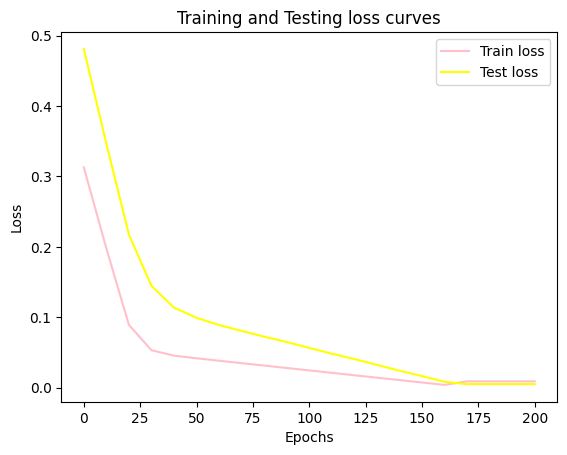

In [702]:
#plot loss curves
plt.plot(epoch_count , numpy_loss , c='pink',label="Train loss")
plt.plot(epoch_count,test_loss_values , c="yellow", label="Test loss")
plt.title("Training and Testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

### saving and loading model in pytorch
We need to save our model to get rid from runing the entire model's cells again,and again .
* There are three main methods you should know about saving and loading models in Pytorch

1. `torch.save()`- saves a Pytorch object in pytorch's pickle format
2. `torch.load()` - allows to load a saved Pytorch object
3. `torch.nn.module.load_state_dict()` - allows to load a model's saved state dictionary


In [703]:
# saving our Pytorch model
from pathlib import Path

# 1. create model's directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. create model save path
MODEL_NAME="-1_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#save the model state dict
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)
MODEL_SAVE_PATH

saving model to : models/-1_pytorch_workflow_model_0.pth


PosixPath('models/-1_pytorch_workflow_model_0.pth')

### Loading pytorch model
since we saved our model's `state_dict()` rather the entire model ,we will create a new instance f our class and load the saved `state_dict()` into that

In [704]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [705]:
# to load in a saved state_dict we have to make a new instance of our model's class
loaded_model_0=linearregression()

#load the saved state_dict of model_0(this will update the new instances with new parameters )
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [706]:
 loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [707]:
#making some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [708]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [709]:
# comparing loaded model predictions with actual model predictiions
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#6 putting it all together
lets go back through the steps above and see it all in one place
1. get Data
2. build or pick a model
3. fit the model on training data
4. evaluate the model
5. make prediction
6. improve predictions
7. save and load trained model


### 6.0 libraries


In [710]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check the version
torch.__version__

'2.6.0+cu124'

create device-agnostic code
* this means if GPU is avaiable and we got the available GPU, our code will use it (for faster computing )
* if no GPU is avaiable , the code wil default to using CPU

In [711]:
# set up device agnostic code
device="cuda" if torch.cuda.is_available() else"CPU"
print(device)


CPU


### 6.1 Data preparing and loading


In [712]:
#create known parameters
weight=0.7
bias=0.3

#create data using linear regression
# creating X,Y (features and labels)
X =torch.arange(start=0,end=1,step=0.02).unsqueeze(dim=1)
Y=bias+(weight*X)

#checking how many data points we have
len(X),len(Y)

(50, 50)

In [713]:
# getting the overview of data
#seeing first 15 values of features and labels
X[:15],Y[:15]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960]]))

Training and Testing split

In [714]:
#data split
tran_split=int(0.8*len(X))
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

Plot predictions

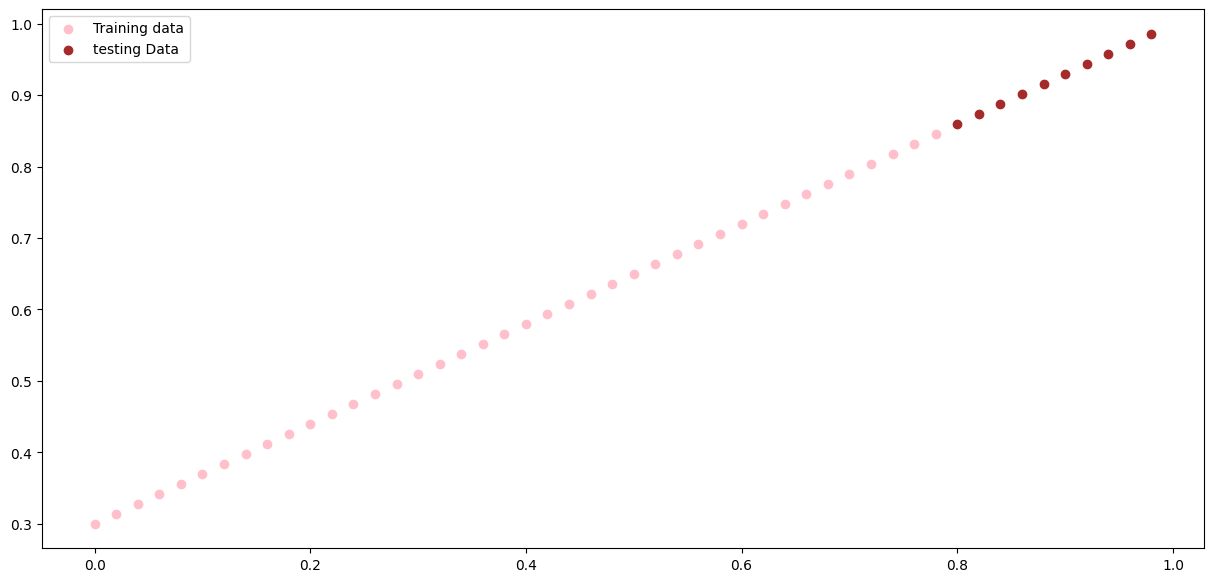

In [715]:
#creating a function to plot prediction and data
def plot_prediction(X_train=X_train,Y_train=Y_train,X_test=X_test,Y_test=Y_test,prediction=None):

  plt.figure(figsize=(15,7))

  plt.scatter(X_train,Y_train , c="pink" , label="Training data")
  plt.scatter(X_test,Y_test, c="brown" , label="testing Data")


  if prediction is not None:
    plt.scatter(X_test,prediction , c="blue" , label ="predictions")

  plt.legend()
  plt.show()

plot_prediction()

### 6.2 Building pytorch linear model

In [716]:
# create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.linear for creating model's parameters
    self.linear_layer=nn.Linear(in_features=1,out_features=1)
  def forward(self,X:torch.tensor): # -> take tensor as input and return tensor
    return self.linear_layer(X)






In [717]:
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1,model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [718]:
# checking the current device
next(model_1.parameters()).device

device(type='cpu')

In [719]:
# set the model to use target device (GPU)
# in our case GPU is not available so this will not work

#model_1.to(device)
#next(model_1.parameters()).device

### Training
Things required for training
* loss function
* Optimizer
* Training loop
* Testing loop

In [720]:
# setup loss function
loss_fn=nn.L1Loss() # mean absolute error

# setup optimizer
opt=torch.optim.SGD(params=model_1.parameters(),lr=0.01)


In [721]:
# training loop
torch.manual_seed(42)
epochs=130


# if GPU available we need to put data on the same  target device(device agnostic code for data)

"""
X_train = X_train.to(device)
Y_test_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)
"""




for epoch in range(epochs):
  # 1 train a model
  model_1.train()

  # 2 forward pass
  y_pred=model_1(X_train)

  #3 calculate the loss
  loss=loss_fn(y_pred,Y_train)

  # 4 optimizer zero grad
  opt.zero_grad()

  # 5 backpropagation
  loss.backward()

  #optimizer step
  opt.step()




  # testing loop
  model_1.eval()
  with torch.inference_mode():
    Y_test_pred=model_1(X_test)

  #calculate the test loss
    test_loss=loss_fn(test_pred,Y_test)

  #printing what is hapening
  if epoch%10==0:
    print(f"epoch: {epoch} | loss: {loss} | test loss: {test_loss}")

epoch: 0 | loss: 0.5551779866218567 | test loss: 0.008447891101241112
epoch: 10 | loss: 0.4399680495262146 | test loss: 0.008447891101241112
epoch: 20 | loss: 0.3247582018375397 | test loss: 0.008447891101241112
epoch: 30 | loss: 0.20954827964305878 | test loss: 0.008447891101241112
epoch: 40 | loss: 0.09433844685554504 | test loss: 0.008447891101241112
epoch: 50 | loss: 0.023886386305093765 | test loss: 0.008447891101241112
epoch: 60 | loss: 0.0199567973613739 | test loss: 0.008447891101241112
epoch: 70 | loss: 0.016517987474799156 | test loss: 0.008447891101241112
epoch: 80 | loss: 0.013089170679450035 | test loss: 0.008447891101241112
epoch: 90 | loss: 0.009653178043663502 | test loss: 0.008447891101241112
epoch: 100 | loss: 0.006215679459273815 | test loss: 0.008447891101241112
epoch: 110 | loss: 0.002787243574857712 | test loss: 0.008447891101241112
epoch: 120 | loss: 0.0012645035749301314 | test loss: 0.008447891101241112


###prediction and evaluation

In [722]:
# evaluation
model_1.eval()
with torch.inference_mode():
  pred=model_1(X_test)


print(f"predictions by model_1 : ")
pred

predictions by model_1 : 


tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

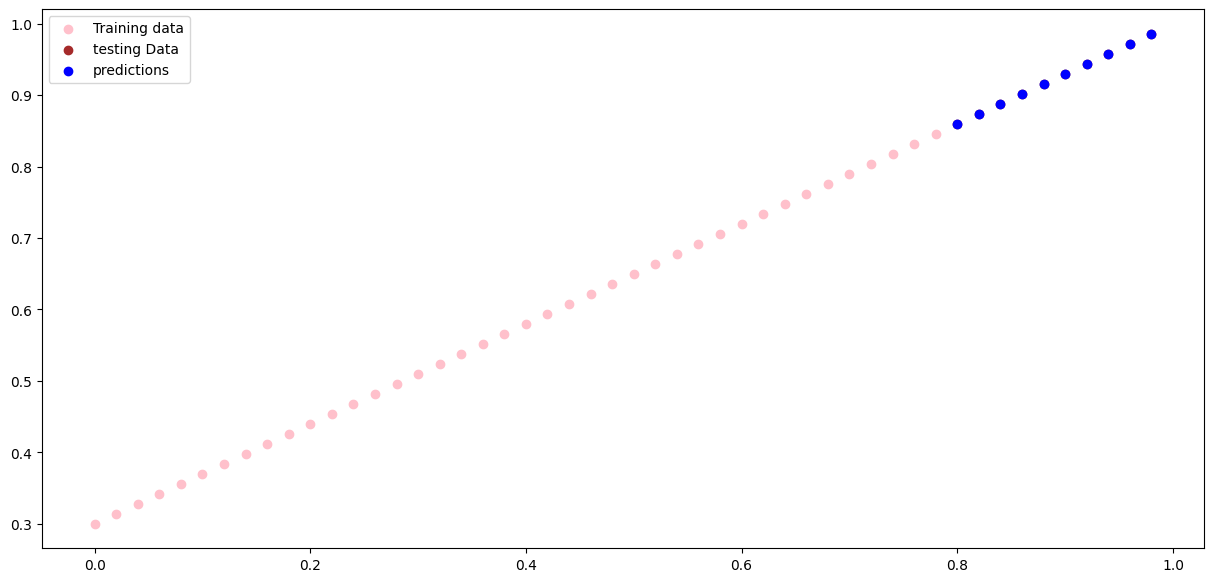

In [723]:
#ploting predictions
plot_prediction( prediction=Y_test_pred)

In [724]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

### Saving and loading the model


In [725]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

# model path
MODE_NAME="ch_01_Pytorch_workflow_model_1,pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#save the model state dict
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

saving model to : models/-1_pytorch_workflow_model_0.pth


In [726]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [727]:
# load models
#create instance of class
loaded_model_1=LinearRegressionModelV2()

#load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<All keys matched successfully>

In [728]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [730]:
#evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds=loaded_model_1(X_test)


Y_test_pred==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])